# Simon's Algorithm
Generalization of the Simon algorithm that was written for two qbits in the [qiskit textbook](https://qiskit.org/textbook/ch-algorithms/simon.html).

In [1]:
from qiskit import*
from qiskit.visualization import plot_histogram
from random import randint

$s \in \{0,1\}^n$ where $n = 1:8$ since IBMQ only provides us with 16 qbits. For QASM Simulator, $n = 1:12$.

In [2]:
n = 7 #number of qbits in a register

#We want the period to be a random bit string of lenght n. Because.
s_integer = randint(0, 2**n-1) 
print('the "period" as integer:', s_integer)

s = bin(s_integer)[2:]
print('the period as binary:', s)

#When we transform s_integer into binary form, it's not necessary that it has the same lenght as n. Thus:
if len(s) != n:
    for i in range(n - len(s)):
        s = '0' + s
else:
    pass

print('the period in proper binary:', s)


the "period" as integer: 49
the period as binary: 110001
the period in proper binary: 0110001


In [3]:
sc = QuantumCircuit(n*2, n)

sc.h(range(n))
sc.barrier()

#This is our oracle, the Simon function, that is. 
for i,j in enumerate(reversed(s)):
    if j == '1':
        for q in range(n):
            sc.cx(i, (n) + q)
        sc.barrier()

sc.h(range(n))
sc.barrier()

sc.measure(range(n), range(n))

In [4]:
sim = Aer.get_backend('qasm_simulator')
results = execute(sc, sim).result().get_counts()
del results['0'*n] #I'd rather not have the 00000... result. It comes by default and has no use.

s_guess = list(results)[0]

### Let's do some magic!
I'm going to guess the period now.

In [5]:
print('The period is:', s_guess, 'Is it really? Let\'s check.')
print('Is', s_guess, 'equal to', s + '?')

if s_guess == s:
    print('Yes, it indeed is. I\'m good at guessing stuff then. That\'s a proven fact now.')
else:
    print('No, it sure is not. Bad luck...')

The period is: 0110001 Is it really? Let's check.
Is 0110001 equal to 0110001?
Yes, it indeed is. I'm good at guessing stuff then. That's a proven fact now.


## Let's send it to the real machine.

In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
provider = IBMQ.get_provider('ibm-q')
device = provider.get_backend('ibmq_16_melbourne')
job = execute(sc, backend = device, shots = 1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


##### Would it be a surprise to see that it doesn't work as well as the simulation?

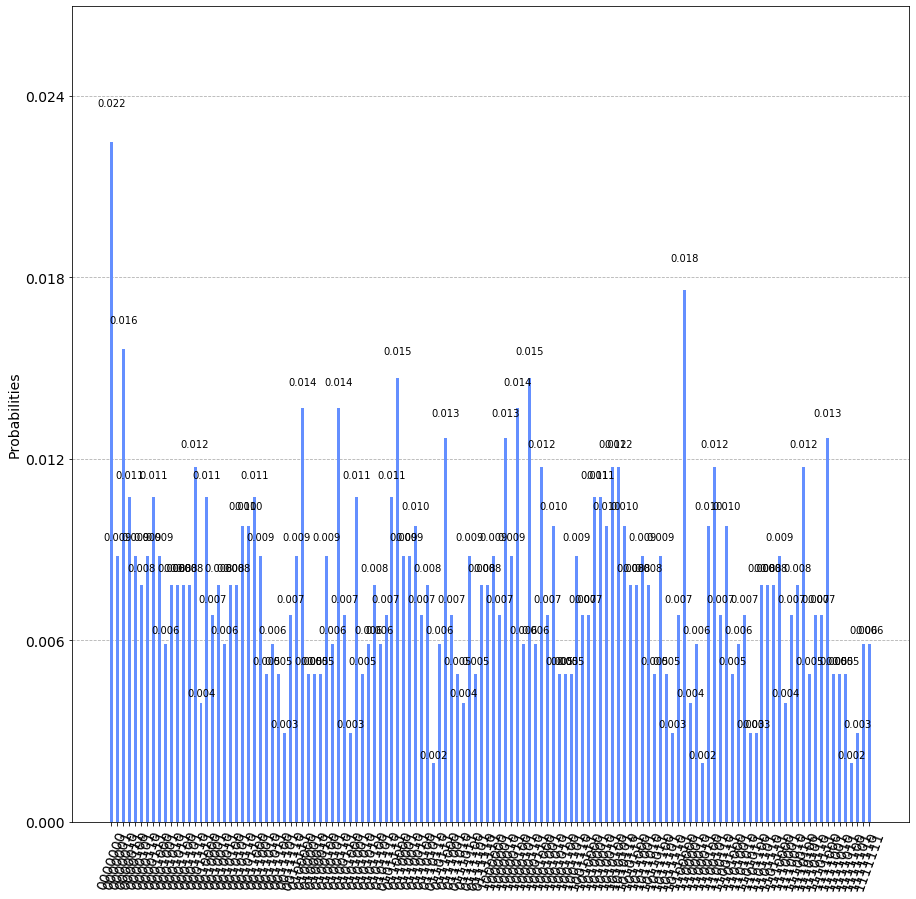

In [10]:
plot_histogram(job.result().get_counts(), figsize = (15, 15))